In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.ticker as ticker

# Data preparation

In [109]:
weather_data = pd.read_csv('weather_features.csv', error_bad_lines=False)
energy_data = pd.read_csv('energy_dataset.csv', error_bad_lines=False)

In [110]:
weather_data_valencia = weather_data[weather_data['city_name'] == 'Valencia']

In [111]:
weather_data_valencia

dt_iso city_name     temp  temp_min  temp_max  \
0      2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1      2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2      2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3      2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4      2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                          ...       ...      ...       ...       ...   
35140  2018-12-31 19:00:00+01:00  Valencia  285.640   285.150   286.150   
35141  2018-12-31 20:00:00+01:00  Valencia  283.140   282.150   284.150   
35142  2018-12-31 21:00:00+01:00  Valencia  281.660   281.150   282.150   
35143  2018-12-31 22:00:00+01:00  Valencia  280.140   279.150   281.150   
35144  2018-12-31 23:00:00+01:00  Valencia  279.140   278.150   280.150   

       pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0          1001        77           1        62      0.0      0.0      0.0   
1          1001        77           1        62      0.0      0.0      0.0   
2          1002        78           0        23      0.0      0.0      0.0   
3          1002        78           0        23      0.0      0.0      0.0   
4          1002        78           0        23      0.0      0.0      0.0   
...         ...       ...         ...       ...      ...      ...      ...   
35140      1028        62           2       140      0.0      0.0      0.0   
35141      1029        71           1       242      0.0      0.0      0.0   
35142      1029        81           3       300      0.0      0.0      0.0   
35143      1029        81           2       310      0.0      0.0      0.0   
35144      1029        75           2       300      0.0      0.0      0.0   

       clouds_all  weather_id weather_main weather_description weather_icon  
0               0         800        clear        sky is clear          01n  
1               0         800        clear        sky is clear          01n  
2               0         800        clear        sky is clear          01n  
3               0         800        clear        sky is clear          01n  
4               0         800        clear        sky is clear          01n  
...           ...         ...          ...                 ...          ...  
35140           0         800        clear        sky is clear          01n  
35141           0         800        clear        sky is clear          01n  
35142           0         800        clear        sky is clear          01n  
35143           0         800        clear        sky is clear          01n  
35144           0         800        clear        sky is clear          01n  

[35145 rows x 17 columns]

In [112]:
energy_data

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
0                        0.0  ...             196.0                       0.0   
1                        0.0  ...             195.0                       0.0   
2                        0.0  ...             196.0                       0.0   
3                        0.0  ...             191.0                       0.0   
4                        0.0  ...             189.0                       0.0   
...      

In [113]:
result_data = pd.concat([energy_data, weather_data_valencia], axis=1, join="inner")
result_data.to_csv('dataset.csv', index=False)

In [121]:
valencia_df = pd.read_csv('dataset.csv', error_bad_lines=False)
valencia_df

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  wind_speed  wind_deg  rain_1h  rain_3h  \
0                        0.0  ...           1        62      0.0      0.0   
1                        0.0  ...           1        62      0.0      0.0   
2                        0.0  ...           0        23      0.0      0.0   
3                        0.0  ...           0        23      0.0      0.0   
4                        0.0  ...           0        23      0.0      0.0   
...                      ...  ...

In [122]:
valencia_df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [142]:
valencia_df = valencia_df.drop(['weather_id', 'clouds_all', 'weather_description' ],axis=1)
# valencia_df = valencia_df.drop(['generation hydro pumped storage aggregated', 'generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat','generation geothermal','generation marine', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'weather_icon', 'rain_1h', 'rain_3h', 'snow_3h' ],axis=1)

In [143]:
valencia_df

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  generation fossil gas  \
0                                     329.0                 4844.0   
1                                     328.0                 5196.0   
2                                     323.0                 4857.0   
3                                     254.0                 4314.0   
4                                     187.0                 4130.0   
...                                     ...                    ...   
35059                                   0.0                 7634.0   
35060                                   0.0                 7241.0   
35061                                   0.0                 7025.0   
35062                                   0.0                 6562.0   
35063                                   0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation hydro pumped storage consumption  \
0                                            863.0   
1                                            920.0   
2                                           1164.0   
3                                           1503.0   
4                                           1826.0   
...                                            ...   
35059                                          1.0   
35060                                          1.0   
35061                                         50.0   
35062                                        108.0   
35063                                        108.0   

       generation hydro run-of-river and poundage  \
0                                          1051.0   
1                                          1009.0   
2                                           973.0   
3                                           949.0   
4                                           953.0   
...                                           ...   
35059                                      1135.0   
35060                                      1172.0   
35061                                      1148.0   
35062                                      1128.0   
35063                                      1069.0   

       generation hydro water reservoir  generation nuclear  ...  \
0                                1899.0              7096.0  ...   
1                                1658.0              7096.0  ...   
2                                1371.0              7099.0  ...   
3                                 779.0              7098.0  ...   
4                                 720.0              7097.0  ...   
...                                 ...                 ...  ...   
35059              

In [132]:
# valencia_df = valencia_df.drop(['dt_iso'], axis=1)
valencia_df = valencia_df.drop(['city_name'], axis=1)
valencia_df.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18
generation wind onshore                        18
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


In [144]:
valencia_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [145]:
valencia_df_without_time = valencia_df.drop(['time'], axis=1)

In [148]:
valencia_df_without_time.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onshore                        0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
temp                                           0
temp_min            

In [179]:
subsample = valencia_df_without_time[['total load actual', 'price actual', 'generation fossil hard coal', 'generation fossil gas', 'temp_min', 'pressure']]

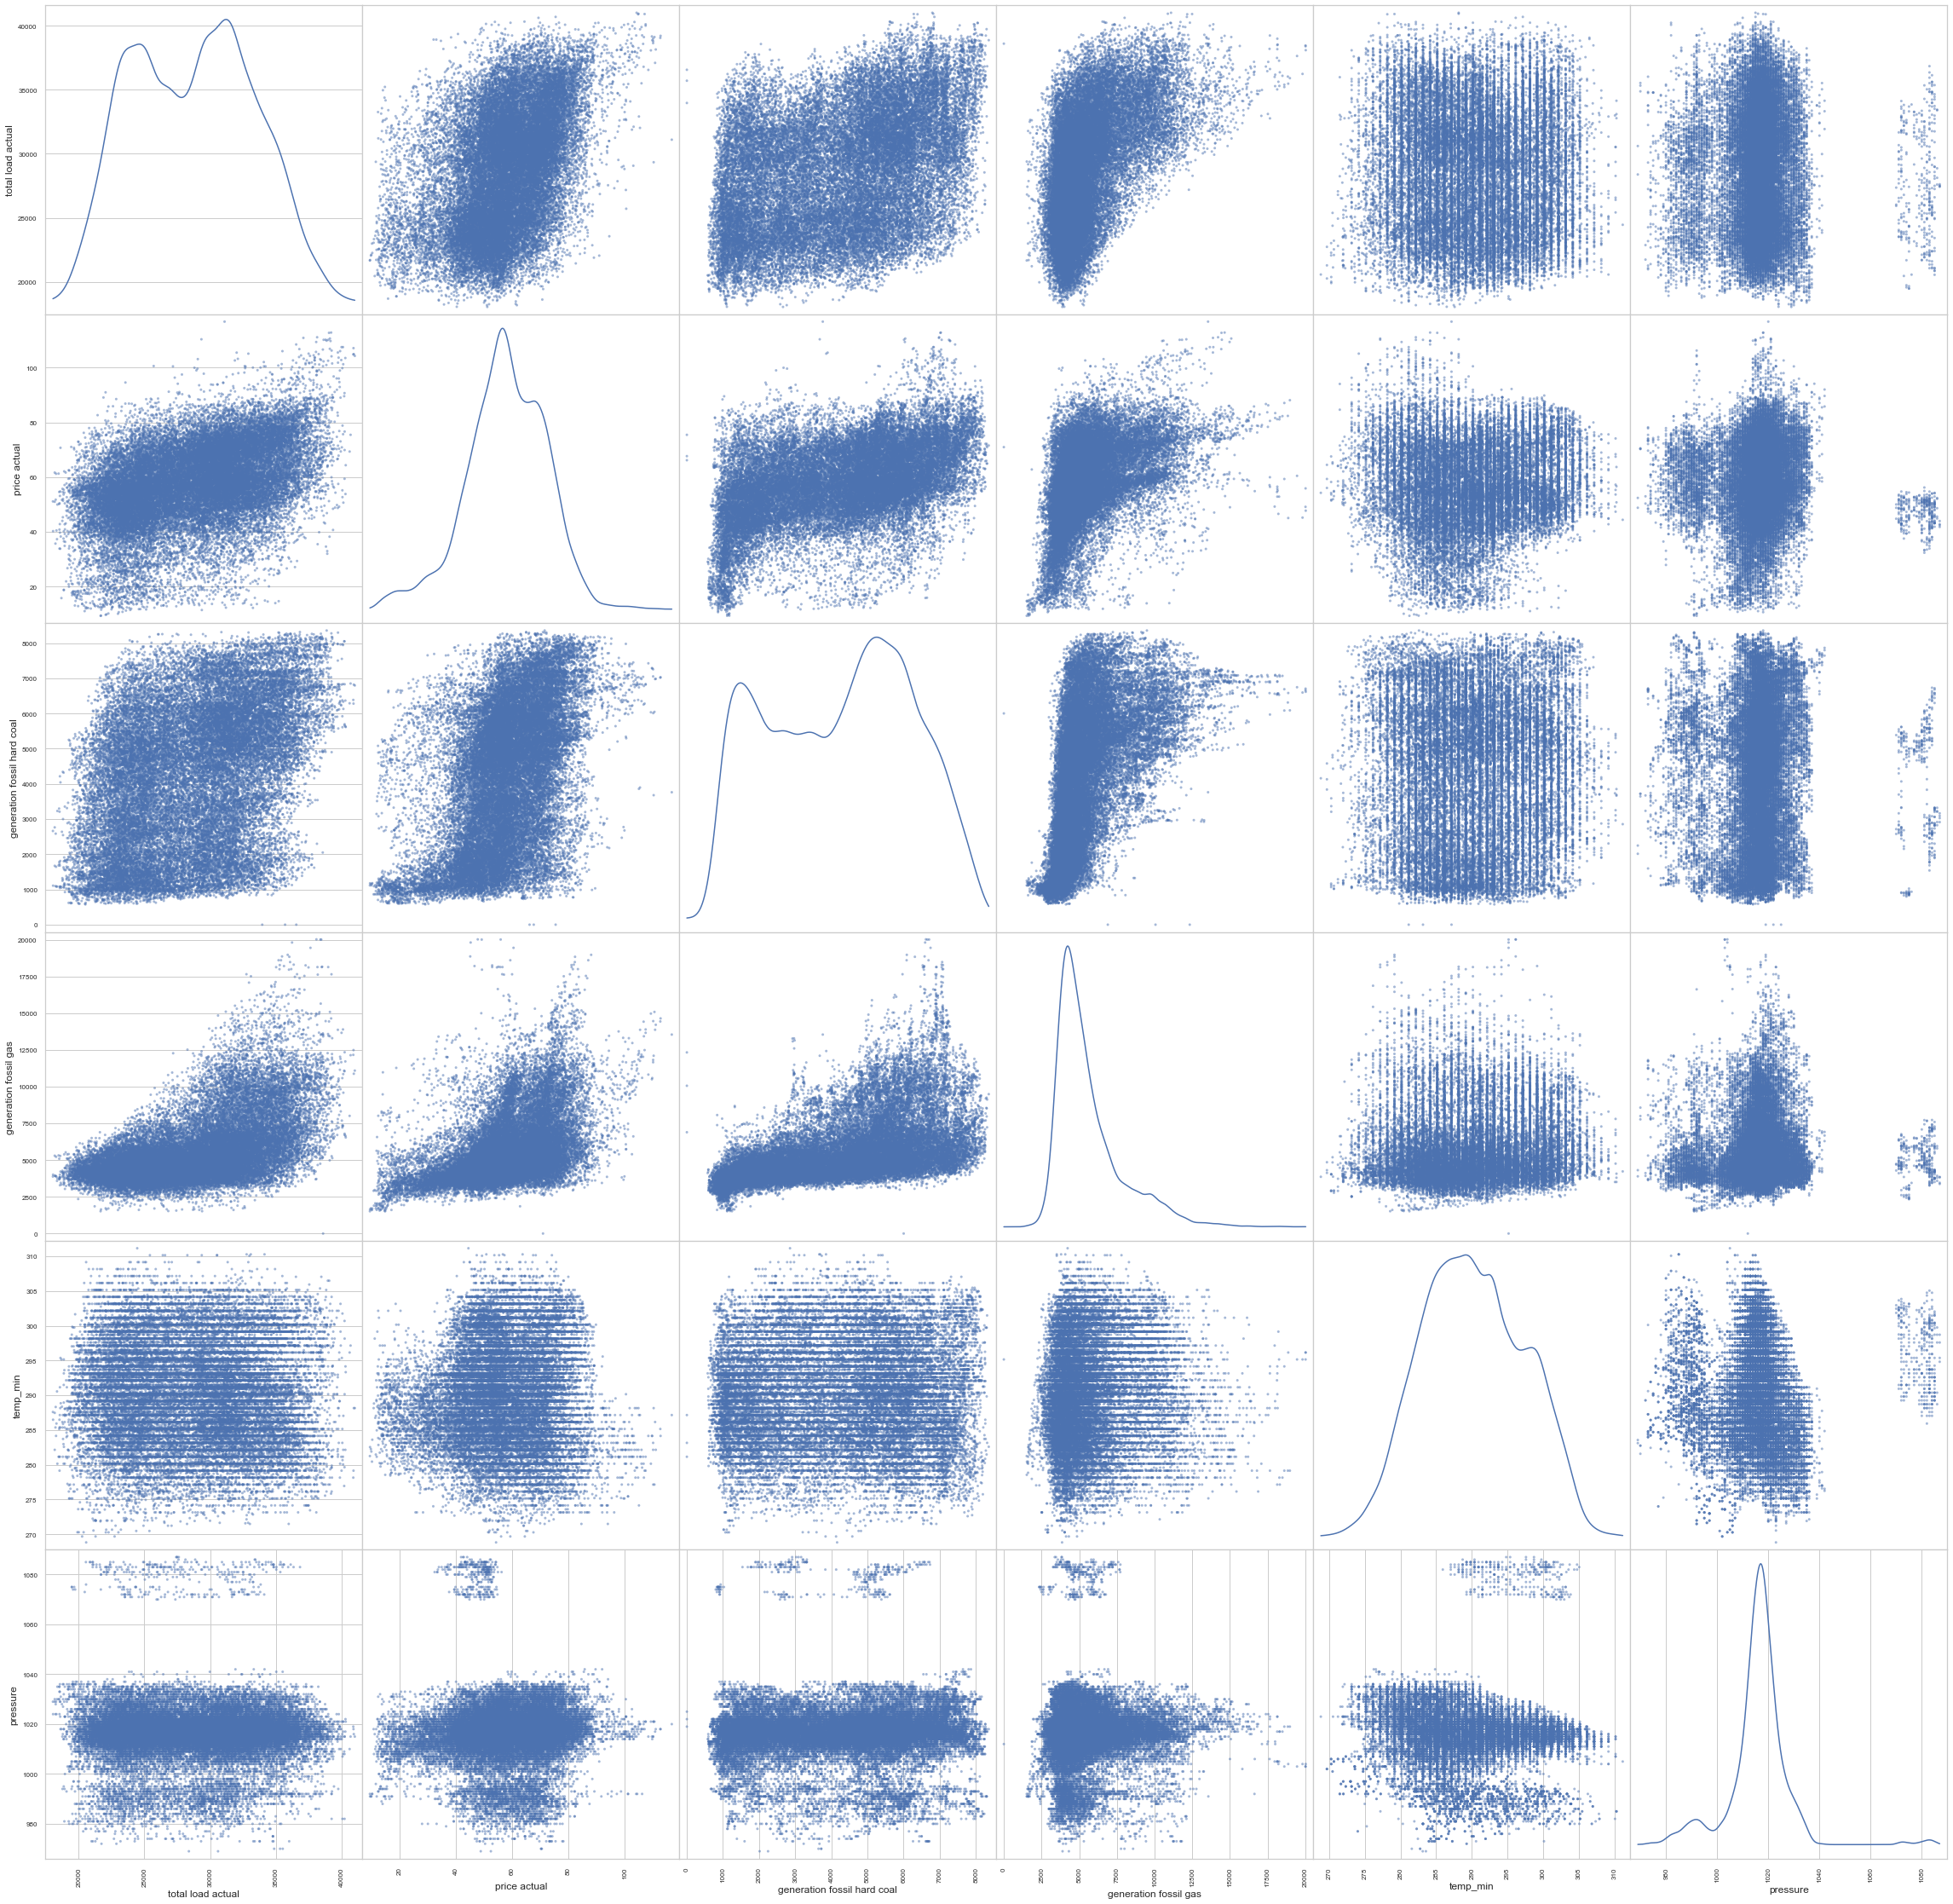

In [182]:
pd.plotting.scatter_matrix(subsample,  diagonal='kde', figsize=(40,40))

plt.show()



In [174]:
# subsample_2 = valencia_df_without_time[['total load actual', 'price actual', 'temp', 'generation fossil hard coal', 'generation fossil gas', 'pressure']]

In [181]:
# pd.plotting.scatter_matrix(subsample_2,  diagonal='kde', figsize=(40,40))

# plt.show()

In [183]:
pd.concat([subsample[subsample_dicr['total load actual'] == level].mean() for level in subsample_dicr['total load actual'].unique()] +\
          [subsample[subsample_dicr['total load actual'] == level].var() for level in subsample_dicr['total load actual'].unique()], axis=1,\
          keys=[f'mean_{level}' for level in subsample_dicr['total load actual'].unique()] +\
          [f'var_{level}' for level in subsample_dicr['total load actual'].unique()])

mean_1        mean_0        mean_2  \
total load actual            23884.655578  20839.584444  27663.782458   
price actual                    51.059834     47.621872     57.256100   
generation fossil hard coal   3565.642706   2755.545432   4051.547869   
generation fossil gas         4428.201493   4241.220494   5008.407227   
temp_min                       290.569070    289.879326    290.506383   
pressure                      1015.852112   1016.152593   1015.787029   

                                   mean_3        mean_4        mean_5  \
total load actual            31372.171914  34947.725048  38167.908151   
price actual                    61.064519     65.871582     73.840839   
generation fossil hard coal   4587.030566   5346.023943   6468.123479   
generation fossil gas         6171.542732   7547.606670   9015.279197   
temp_min                       290.256333    289.480058    289.768575   
pressure                      1015.746678   1016.704490   1015.332117   

                                    var_1         var_0         var_2  \
total load actual            1.129455e+06  5.894531e+05  1.294731e+06   
price actual                 1.659879e+02  1.654627e+02  1.695231e+02   
generation fossil hard coal  3.186937e+06  2.195263e+06  3.651813e+06   
generation fossil gas        8.706150e+05  4.324938e+05  2.138897e+06   
temp_min                     4.947255e+01  4.656067e+01  5.310453e+01   
pressure                     1.549437e+02  1.803853e+02  1.566233e+02   

                                    var_3         var_4         var_5  
total load actual            1.152967e+06  1.060755e+06  5.861277e+05  
price actual                 1.567970e+02  1.650320e+02  2.116106e+02  
generation fossil hard coal  3.514167e+06  3.011674e+06  1.461147e+06  
generation fossil gas        4.994098e+06  6.920490e+06  7.236023e+06  
temp_min                     4.589939e+01  5.199583e+01  6.822240e+01  
pressure                     1.338565e+02  1.109473e+02  6.575193e+01

In [184]:
def pearsonr_ci(x, y, alpha=0.05):
    # calculates Pearson correlation along with the confidence interval using scipy and numpy
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

<ipython-input-184-0193bd620d56>:4: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


Text(0.5, 1.0, 'Upper bound of confidence interval')

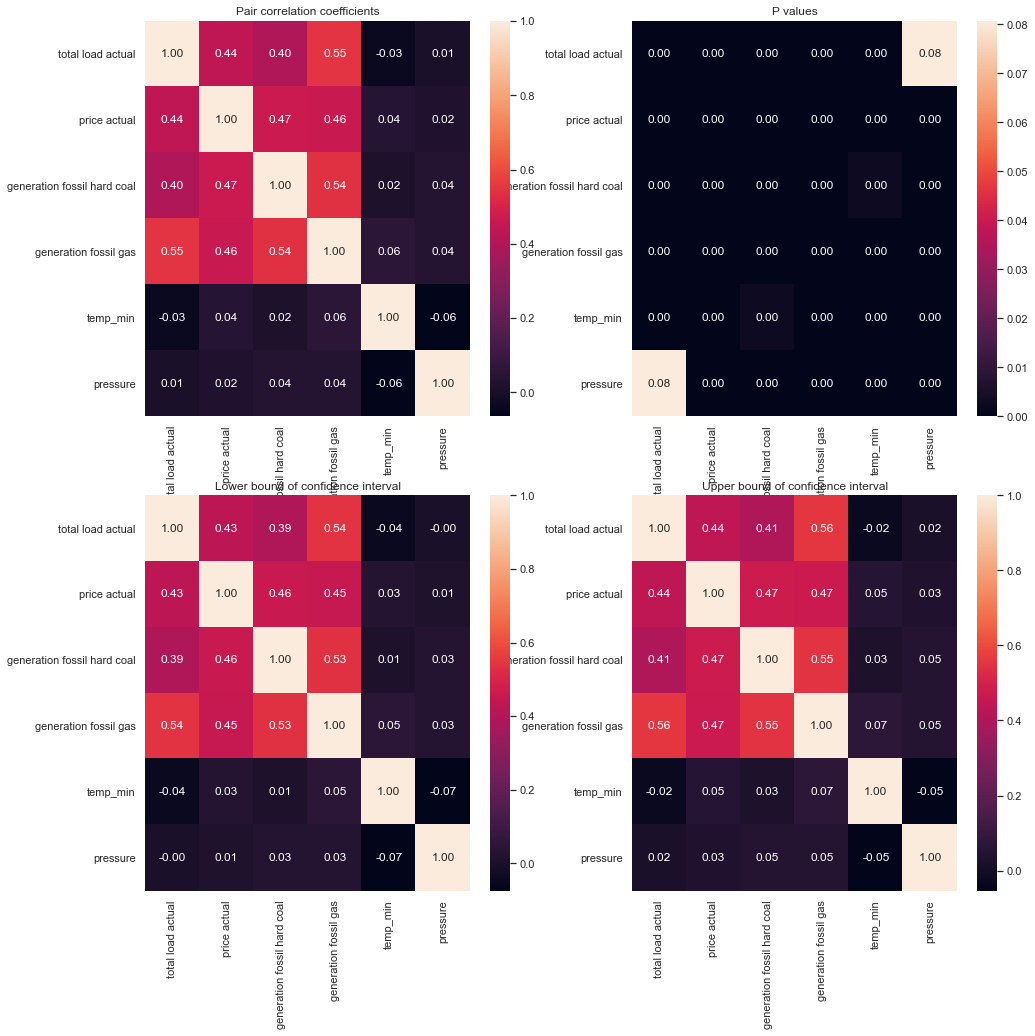

In [185]:
r_mat = pd.DataFrame({col: np.zeros(6) for col in subsample.columns}, index=subsample.columns)
p_mat = pd.DataFrame({col: np.zeros(6) for col in subsample.columns}, index=subsample.columns)
lo_mat = pd.DataFrame({col: np.zeros(6) for col in subsample.columns}, index=subsample.columns)
hi_mat = pd.DataFrame({col: np.zeros(6) for col in subsample.columns}, index=subsample.columns)
for col1 in subsample.columns:
  for col2 in subsample.columns:
    r, p, lo, hi = pearsonr_ci(subsample[col1], subsample[col2])
    r_mat.loc[col1, col2] = r
    p_mat.loc[col1, col2] = p
    lo_mat.loc[col1, col2] = lo
    hi_mat.loc[col1, col2] = hi
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
sns.heatmap(r_mat, annot=True, ax=axs[0][0], fmt='.2f')
axs[0][0].set_title('Pair correlation coefficients')
sns.heatmap(p_mat, annot=True, ax=axs[0][1], fmt='.2f')
axs[0][1].set_title('P values')
sns.heatmap(lo_mat, annot=True, ax=axs[1][0], fmt='.2f')
axs[1][0].set_title('Lower bound of confidence interval')
sns.heatmap(hi_mat, annot=True, ax=axs[1][1], fmt='.2f')
axs[1][1].set_title('Upper bound of confidence interval')

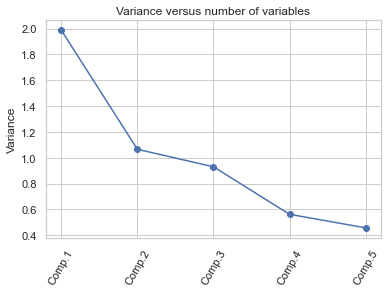

In [187]:
standardisedX = scale(subsample.drop(columns=['total load actual']))
standardisedX = pd.DataFrame(standardisedX, index=subsample.index, columns=[x for x in subsample.columns if x != 'total load actual'])
pca = PCA().fit(standardisedX)
y = subsample['total load actual']

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('Variance versus number of variables')
    plt.show()

screeplot(pca, standardisedX)

In [188]:
X = subsample.drop(columns=['total load actual'])
y = subsample['total load actual']
edge = len(subsample) * 7 // 10
X_train = X[:edge]
X_test = X[edge:]
y_train = y[:edge]
y_test = y[edge:]

Resulting mean absolute error is 3087.9537, mean squared error is 13885951.2923, determination coefficient is 0.3575


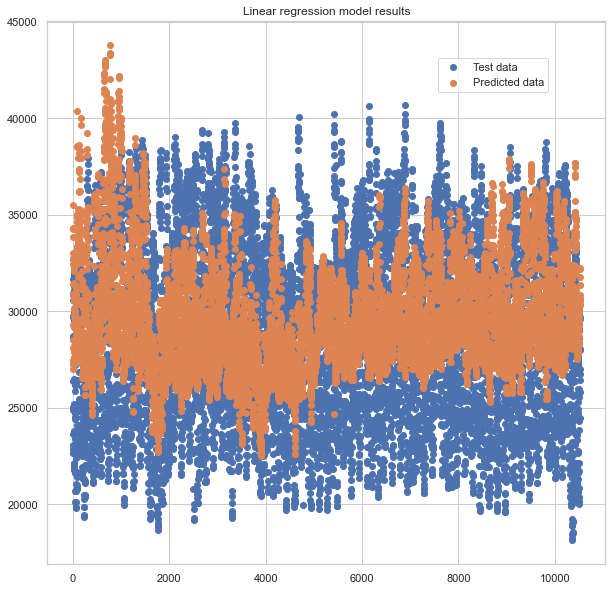

In [191]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f"Resulting mean absolute error is {mean_absolute_error(y_test, preds):.4f}, mean squared error is {mean_squared_error(y_test, preds):.4f}, determination coefficient is {r2_score(y_test, preds):.4f}")
x_domain = range(len(y_test))

fig = plt.figure(1, figsize=(10, 10))

plt.scatter(x_domain, y_test, label='Test data')
plt.scatter(x_domain, preds, label='Predicted data')
plt.title('Linear regression model results')

plt.legend(loc="center right", borderaxespad=0.1, bbox_to_anchor=(0.9, 0.9))